In [52]:
import numpy as np
import matplotlib.pyplot as plt

class NoisyLIFNeuron:
    def __init__(self, tau, R, threshold, sigma,we=0.1,wi=0.1, dt=0.01):
        self.tau = tau  # Membrane time constant
        self.R = R      # Membrane resistance
        self.threshold = threshold  # Firing threshold
        self.sigma = sigma #Amplitude of the noise (in units of voltage)
        self.dt = dt    # Time step
        self.we = we
        self.wi = wi
        self.reset()

    def reset(self):
        self.voltage = 0.0  # Initial membrane potential

    def update(self, I, exc, inh):
        # Membrane potential update using Euler method
        dv = (-(self.voltage) + self.R * I) / self.tau * self.dt + self.sigma*np.sqrt(self.dt)*np.random.normal(0, 1)
        self.voltage += dv
        if exc:
            self.voltage += self.we
        if inh:
            self.voltage -= self.wi
        # Check for spike
        if self.voltage >= self.threshold:
            self.voltage = 0.0  # Reset membrane potential after spike
            return True
        else:
            return False

def simulate_neuron(I, tau, R, threshold, sigma, spikes_bg_e,spikes_bg_i, we, wi, dt=0.01, duration=10):
    neuron = NoisyLIFNeuron(tau, R, threshold, sigma,we,wi, dt)
    time = np.arange(0, duration, dt)
    spikes = []
    voltages = []
    for t in time:
        exc = False
        inh = False
        if t in spikes_bg_e:
            exc = True
        if t in spikes_bg_i:
            inh = True
        spike = neuron.update(I, exc, inh)
        voltages.append(neuron.voltage)
        if spike:
            spikes.append(t)
    return spikes, voltages


def background(dt, t, N_background, lambda_, tau, seed):
    np.random.seed(seed)  # Set seed for reproducibility
    bg = 0
    spikes_bg = []
    for j in range(N_background):
        # Generate Poisson process
        events = np.random.poisson(lambda_ * dt, len(t))
        events[events > 1] = 1  # Ensure at most one event per timestep

        #obtain spike times
        spikes_temp = events*t
        spike_times = spikes_temp[spikes_temp != 0]
        spikes_bg = np.concatenate((spikes_bg,spike_times))
    return spikes_bg



# Plot 8.6 (a)

In [53]:
# Simulation parameters
tau = 10 # Membrane time constant (ms)
R = 1    # Membrane resistance
threshold = 1 # Firing threshold
sigma = 0  #NO STOCHASTIC NOISE
dt = 0.01 # Time step (ms)
duration = 200  # Duration of simulation (ms)
t=np.arange(0, duration, dt)

I = 0.8  # Input current (arbitrary units)

lambda_hz_e = 10  # Rate of the Poisson process (in Hz) (of each single background neuron)
lambda_e = lambda_hz_e/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_e = 100
w_e = 0.1 #synaptic weight

lambda_hz_i = 10 # Rate of the Poisson process (in Hz)
lambda_i = lambda_hz_i/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_i = 100
w_i = 0.1 #synaptic weight

spikes_bg_e = background(dt,t,N_bg_e, lambda_e, tau, seed = 123)
spikes_bg_i = background(dt,t,N_bg_i, lambda_i, tau, seed = 321)



spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, spikes_bg_e, spikes_bg_i, w_e, w_i, dt, duration)
u =  voltages

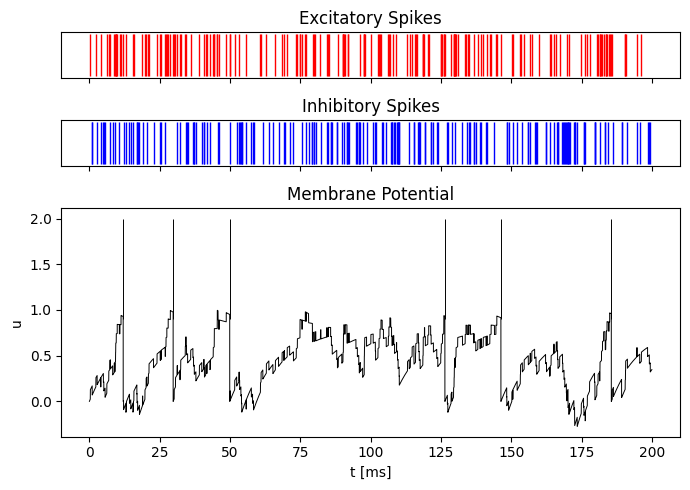

In [54]:
# Create figure and subplots with different aspect ratios
fig, axs = plt.subplots(3, 1, figsize=(7, 5), gridspec_kw={'height_ratios': [1,1, 5]}, sharex=True)

# Plot data on the first subplot
axs[0].vlines(spikes_bg_e, ymin=0, ymax=1, colors='red', linestyles='-', linewidth=1)
axs[0].set_title('Excitatory Spikes')
# Hide y ticks and labels of the upper plot
axs[0].tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on the first subplot
axs[1].vlines(spikes_bg_i, ymin=0, ymax=1, colors='blue', linestyles='-', linewidth=1)
axs[1].set_title('Inhibitory Spikes')
# Hide y ticks and labels of the upper plot
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on the second subplot
axs[2].plot(t, u, color = 'black', linewidth = 0.7)
axs[2].vlines(spikes, ymin=0.9, ymax=2, colors= 'black', linestyles='-', linewidth = 0.7)
axs[2].set_title('Membrane Potential')
axs[2].set_xlabel('t [ms]')
axs[2].set_ylabel('u')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Plot 8.6 (b)

In [55]:
# Simulation parameters
tau = 10 # Membrane time constant (ms)
R = 1    # Membrane resistance
threshold = 1 # Firing threshold
sigma = 0  #NO STOCHASTIC NOISE
dt = 0.01 # Time step (ms)
duration = 200  # Duration of simulation (ms)
t=np.arange(0, duration, dt)

I = 0.8  # Input current (arbitrary units)

lambda_hz_e = 160  # Rate of the Poisson process (in Hz) (of each single background neuron)
lambda_e = lambda_hz_e/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_e = 100
w_e = 0.025 #synaptic weight

lambda_hz_i = 160 # Rate of the Poisson process (in Hz)
lambda_i = lambda_hz_i/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_i = 100
w_i = 0.025 #synaptic weight

spikes_bg_e = background(dt,t,N_bg_e, lambda_e, tau, seed = 123)
spikes_bg_i = background(dt,t,N_bg_i, lambda_i, tau, seed = 321)



spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, spikes_bg_e, spikes_bg_i, w_e, w_i, dt, duration)
u =  voltages

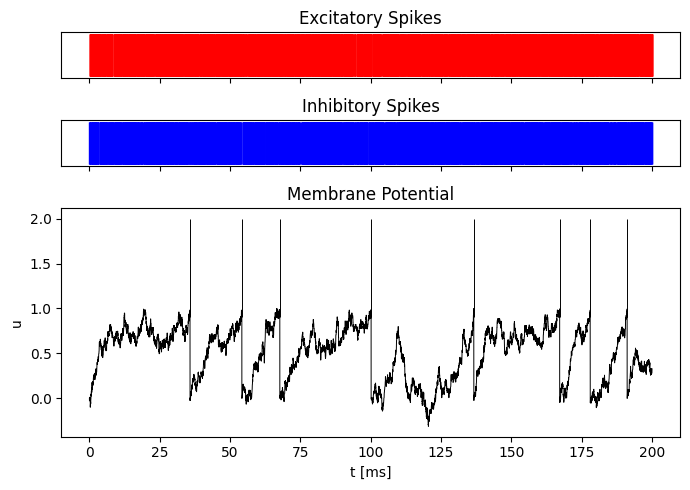

In [56]:
# Create figure and subplots with different aspect ratios
fig, axs = plt.subplots(3, 1, figsize=(7, 5), gridspec_kw={'height_ratios': [1,1, 5]}, sharex=True)

# Plot data on the first subplot
axs[0].vlines(spikes_bg_e, ymin=0, ymax=1, colors='red', linestyles='-', linewidth=1)
axs[0].set_title('Excitatory Spikes')
# Hide y ticks and labels of the upper plot
axs[0].tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on the first subplot
axs[1].vlines(spikes_bg_i, ymin=0, ymax=1, colors='blue', linestyles='-', linewidth=1)
axs[1].set_title('Inhibitory Spikes')
# Hide y ticks and labels of the upper plot
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on the second subplot
axs[2].plot(t, u, color = 'black', linewidth = 0.7)
axs[2].vlines(spikes, ymin=0.9, ymax=2, colors= 'black', linestyles='-', linewidth = 0.7)
axs[2].set_title('Membrane Potential')
axs[2].set_xlabel('t [ms]')
axs[2].set_ylabel('u')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
